In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
sample_window = pd.read_csv("./data/CreditSampleWindow.csv",encoding="utf8")

In [3]:
sample_window.shape

(1813157, 5)

In [5]:
sample_window.head(5)

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE
0,CID0128273,,M0,20170701.0,20170703.0
1,CID0214787,,M0,20180201.0,20180204.0
2,CID0287932,M4,M5,20180501.0,20180531.0
3,CID0351850,,M0,20161002.0,20161005.0
4,CID0217310,,M0,20150601.0,20150602.0


In [6]:
sample_window.drop_duplicates(inplace=True)

In [7]:
sample_window.dropna(subset=['STAGE_BEF','STAGE_AFT'], inplace=True)
sample_window.shape

(1663660, 5)

In [8]:
sample_window["START_MONTH"] = sample_window.START_DATE.apply(lambda x: int(x//100))
sample_window["CLOSE_MONTH"] = sample_window.CLOSE_DATE.apply(lambda x: int(x//100))
sample_window["AFT_FLAG"] = sample_window.STAGE_AFT.apply(lambda x: int(x[-1]))

In [9]:
sample_window.loc[sample_window.CLOSE_MONTH == 0,"CLOSE_MONTH"] = 201805

In [10]:
sample_window.head()

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE,START_MONTH,CLOSE_MONTH,AFT_FLAG
0,CID0128273,,M0,20170701.0,20170703.0,201707,201707,0
1,CID0214787,,M0,20180201.0,20180204.0,201802,201802,0
2,CID0287932,M4,M5,20180501.0,20180531.0,201805,201805,5
3,CID0351850,,M0,20161002.0,20161005.0,201610,201610,0
4,CID0217310,,M0,20150601.0,20150602.0,201506,201506,0


In [11]:
# 提取 ID、月份、月份对应状态作为新的数据
overdue = sample_window.loc[:,["CID","START_MONTH","AFT_FLAG"]]\
    .rename(columns={"START_MONTH":"CLOSE_MONTH"})\
    .append(sample_window.loc[:,["CID","CLOSE_MONTH","AFT_FLAG"]],
    ignore_index=True)

In [12]:
overdue.head()

,CID,CLOSE_MONTH,AFT_FLAG
0,CID0128273,201707,0
1,CID0214787,201802,0
2,CID0287932,201805,5
3,CID0351850,201610,0
4,CID0217310,201506,0


In [13]:
# 生成每个订单的逾期信息
overdue = overdue.sort_values(by=["CID","CLOSE_MONTH","AFT_FLAG"])\
    .drop_duplicates(subset=["CID","CLOSE_MONTH"],keep="last")\
    .set_index(["CID","CLOSE_MONTH"]).unstack(1)

In [14]:
overdue.columns = overdue.columns.droplevel()

In [15]:
overdue.head()

CLOSE_MONTH,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,...,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805
CID,,,,,,,,,,,,,,,,,,,,,
CID0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CID0000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CID0000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
CID0000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN
CID0000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
df = overdue

In [19]:
trans_mat = pd.DataFrame(data=0,columns=range(0,10),index=range(0,10))

In [20]:
trans_mat

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [27]:
counter = collections.Counter()

In [15]:
overdue.head()

CLOSE_MONTH,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,...,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805
CID,,,,,,,,,,,,,,,,,,,,,
CID0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CID0000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CID0000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
CID0000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN
CID0000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [30]:
for i,j in zip(df.columns,df.columns[1:]):
    select = (df[i].notnull()) & (df[j].notnull())
    counter += collections.Counter(tuple(x) for x in df.loc[select, [i,j]].values)

In [ ]:
# counter

In [32]:
for key in counter.keys():
    trans_mat.loc[key[0],key[1]] = counter[key]

In [39]:
trans_mat

,0,1,2,3,4,5,6,7,8,9,all_count,bad_count
0,218269,78639,3232,0,0,0,0,0,2,2,300144,81875
1,59218,169811,20351,9020,0,16,8,8,2,6,258440,29411
2,556,4061,3775,17287,7,0,0,0,0,0,25686,17294
3,184,1233,586,1686,22226,446,0,0,0,2,26363,22674
4,1,20,5,0,233,13634,2803,8,0,0,16704,16445
5,0,2,2,0,0,211,14936,911,0,0,16062,15847
6,0,0,0,2,0,0,179,17223,9,8,17421,17240
7,0,8,0,0,8,0,8,1292,14262,4,15582,14266
8,2,2,0,0,0,0,2,4,98,12527,12635,12527
9,0,10,2,4,0,4,8,12,22,247,309,0


In [34]:
trans_mat["all_count"] = trans_mat.apply(sum, axis=1)

In [36]:
bad_count = []
for j in range(10):
    bad_count.append(trans_mat.iloc[j,j+1:10].sum())

In [37]:
bad_count

[81875, 29411, 17294, 22674, 16445, 15847, 17240, 14266, 12527, 0]

In [38]:
trans_mat["bad_count"] = bad_count

In [40]:
trans_mat["to_bad"] = trans_mat["bad_count"]/trans_mat["all_count"]

In [41]:
trans_mat

,0,1,2,3,4,5,6,7,8,9,all_count,bad_count,to_bad
0,218269,78639,3232,0,0,0,0,0,2,2,300144,81875,0.272786
1,59218,169811,20351,9020,0,16,8,8,2,6,258440,29411,0.113802
2,556,4061,3775,17287,7,0,0,0,0,0,25686,17294,0.673285
3,184,1233,586,1686,22226,446,0,0,0,2,26363,22674,0.860069
4,1,20,5,0,233,13634,2803,8,0,0,16704,16445,0.984495
5,0,2,2,0,0,211,14936,911,0,0,16062,15847,0.986614
6,0,0,0,2,0,0,179,17223,9,8,17421,17240,0.989610
7,0,8,0,0,8,0,8,1292,14262,4,15582,14266,0.915544
8,2,2,0,0,0,0,2,4,98,12527,12635,12527,0.991452
9,0,10,2,4,0,4,8,12,22,247,309,0,0.000000


In [16]:
import collections
def get_mat(df):
    """
    构建转移矩阵，索引表示转移前的逾期状态，
    列名表示转移后的逾期状态。
    """
    trans_mat = pd.DataFrame(data=0,columns=range(0,10),index=range(0,10))
    counter = collections.Counter()
    for i,j in zip(df.columns,df.columns[1:]):
        select = (df[i].notnull()) & (df[j].notnull())
        counter += collections.Counter(tuple(x) for x in df.loc[select, [i,j]].values)
    for key in counter.keys():
        trans_mat.loc[key[0],key[1]] = counter[key]
    trans_mat["all_count"] = trans_mat.apply(sum, axis=1)
    bad_count = []
    for j in range(10):
        bad_count.append(trans_mat.iloc[j,j+1:10].sum())
    trans_mat["bad_count"] = bad_count
    trans_mat["to_bad"] = trans_mat["bad_count"]/trans_mat["all_count"]
    return trans_mat

In [17]:
get_mat(overdue)

,0,1,2,3,4,5,6,7,8,9,all_count,bad_count,to_bad
0,218269,78639,3232,0,0,0,0,0,2,2,300144,81875,0.272786
1,59218,169811,20351,9020,0,16,8,8,2,6,258440,29411,0.113802
2,556,4061,3775,17287,7,0,0,0,0,0,25686,17294,0.673285
3,184,1233,586,1686,22226,446,0,0,0,2,26363,22674,0.860069
4,1,20,5,0,233,13634,2803,8,0,0,16704,16445,0.984495
5,0,2,2,0,0,211,14936,911,0,0,16062,15847,0.986614
6,0,0,0,2,0,0,179,17223,9,8,17421,17240,0.989610
7,0,8,0,0,8,0,8,1292,14262,4,15582,14266,0.915544
8,2,2,0,0,0,0,2,4,98,12527,12635,12527,0.991452
9,0,10,2,4,0,4,8,12,22,247,309,0,0.000000


In [44]:
first_use = pd.read_csv("./data/CreditFirstUse.csv",encoding="utf8")

In [45]:
first_use.head()

,CID,FST_USE_DT
0,CID0092102,20161116
1,CID0111878,20161118
2,CID0264977,20161120
3,CID0059996,20160907
4,CID0057096,20160910


In [46]:
first_use.set_index("CID",inplace=True)
first_use["FST_USE_MONTH"] = first_use.FST_USE_DT.map(lambda x:x//100)
first_use.head()

,FST_USE_DT,FST_USE_MONTH
CID,,
CID0092102,20161116,201611
CID0111878,20161118,201611
CID0264977,20161120,201611
CID0059996,20160907,201609
CID0057096,20160910,201609


In [47]:
# 计算每笔订单第一次出现逾期的月份索引位置
def get_first_overdue(ser):
    array = np.where(ser >= 2)[0]
    if array.size > 0:
        return array[0]
    else:
        return np.nan

In [70]:
ser = overdue.iloc[18,:]

In [71]:
array = np.where(ser >= 2)
array

(array([], dtype=int64),)

In [67]:
np.where?

In [80]:
a = ser >= 2

In [81]:
a.nonzero?

In [78]:
array = np.where(ser >= 2)#[0]

In [79]:
array

(array([], dtype=int64),)

In [48]:
OVERDUE_INDEX = overdue.apply(get_first_overdue, axis=1)
# 用时约 1 ～ 2 分钟

In [51]:
[*enumerate(overdue.columns)]

[(0, 201503),
 (1, 201504),
 (2, 201505),
 (3, 201506),
 (4, 201507),
 (5, 201508),
 (6, 201509),
 (7, 201510),
 (8, 201511),
 (9, 201512),
 (10, 201601),
 (11, 201602),
 (12, 201603),
 (13, 201604),
 (14, 201605),
 (15, 201606),
 (16, 201607),
 (17, 201608),
 (18, 201609),
 (19, 201610),
 (20, 201611),
 (21, 201612),
 (22, 201701),
 (23, 201702),
 (24, 201703),
 (25, 201704),
 (26, 201705),
 (27, 201706),
 (28, 201707),
 (29, 201708),
 (30, 201709),
 (31, 201710),
 (32, 201711),
 (33, 201712),
 (34, 201801),
 (35, 201802),
 (36, 201803),
 (37, 201804),
 (38, 201805)]

In [49]:
first_use["OVERDUE_INDEX"] = OVERDUE_INDEX

In [50]:
first_use["START_INDEX"] = first_use.FST_USE_MONTH.map({k:v
    for v,k in enumerate(overdue.columns)})
first_use.loc[first_use.OVERDUE_INDEX.notnull()].head()


,FST_USE_DT,FST_USE_MONTH,OVERDUE_INDEX,START_INDEX
CID,,,,
CID0082006,20160906,201609,26.0,18.0
CID0383647,20160906,201609,29.0,18.0
CID0006192,20161022,201610,28.0,19.0
CID0348120,20161122,201611,33.0,20.0
CID0155834,20161123,201611,28.0,20.0


In [52]:
# 查看异常数据
first_use[first_use.OVERDUE_INDEX < first_use.START_INDEX]

,FST_USE_DT,FST_USE_MONTH,OVERDUE_INDEX,START_INDEX
CID,,,,
CID0164451,20170722,201707,9.0,28.0


In [57]:
month_count = (first_use.OVERDUE_INDEX - first_use.START_INDEX).value_counts().sort_index()[1:]

In [82]:
month_count

1.0        1
2.0      231
3.0      498
4.0      843
5.0     1078
6.0     1457
7.0     1647
8.0     2039
9.0     2000
10.0    1824
11.0    1768
12.0    1719
13.0    1587
14.0    1473
15.0    1318
16.0    1338
17.0    1149
18.0    1107
19.0    1048
20.0     855
21.0     878
22.0     657
23.0     532
24.0     552
25.0     454
26.0     426
27.0     333
28.0     342
29.0     321
30.0     293
31.0     261
32.0     207
33.0     216
34.0     160
35.0     140
36.0     128
37.0     110
38.0      51
dtype: int64

In [83]:
a = list(month_count)

In [85]:
import matplotlib.pyplot as plt

plt.plot(a)

In [84]:
a

[1,
 231,
 498,
 843,
 1078,
 1457,
 1647,
 2039,
 2000,
 1824,
 1768,
 1719,
 1587,
 1473,
 1318,
 1338,
 1149,
 1107,
 1048,
 855,
 878,
 657,
 532,
 552,
 454,
 426,
 333,
 342,
 321,
 293,
 261,
 207,
 216,
 160,
 140,
 128,
 110,
 51]

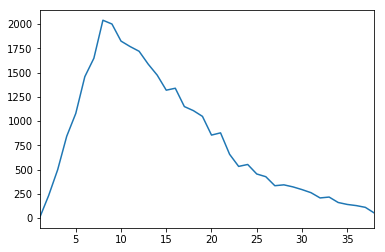

In [59]:
month_count.plot();

In [74]:
45;

In [75]:
print(45);

45


In [ ]:
%matplotlib inline

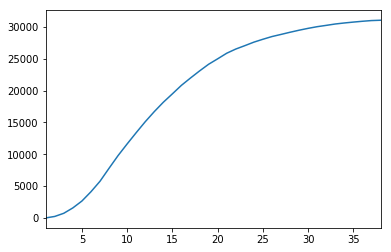

In [77]:
month_count.cumsum().plot();

In [ ]:
np.where

In [2]:
import pandas as pd
import numpy as np

In [4]:
# 载入数据

train_data = pd.read_csv("./data/cs-training.csv",index_col=0, engine="python")
# 查看数据分布
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [5]:
train_data.drop_duplicates(inplace=True)

In [6]:
import missingno as msno
msno.matrix(train_data);

In [7]:
median = train_data.MonthlyIncome.median()
median

5400.0

In [8]:
train_data.MonthlyIncome.fillna(value=median, inplace=True)

In [9]:
train_data.dropna(inplace=True)
train_data.isnull().mean()

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [10]:
train_data = train_data.loc[train_data.age>0]

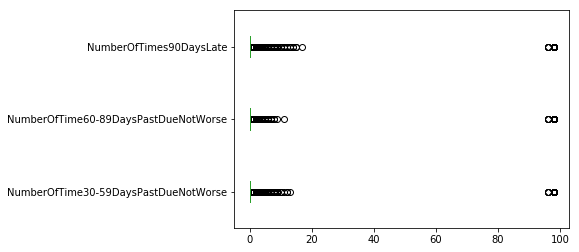

In [11]:
import matplotlib.pyplot as plt
columns = ["NumberOfTime30-59DaysPastDueNotWorse",
"NumberOfTime60-89DaysPastDueNotWorse",
"NumberOfTimes90DaysLate"]
train_data[columns].plot.box(vert=False);
# plt.xticks(rotation=90);

In [12]:
for col in columns:
    train_data = train_data.loc[train_data[col] < 90]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
Y = train_data['SeriousDlqin2yrs']
X = train_data.iloc[:, 1:]
X_train, X_vali, Y_train, Y_vali = train_test_split(X, Y, test_size=0.3,random_state=1)
model_data = pd.concat([Y_train, X_train], axis=1)
vali_data = pd.concat([Y_vali, X_vali], axis=1)

In [15]:
model_data["SeriousDlqin2yrs"].value_counts()

0    94927
1     6820
Name: SeriousDlqin2yrs, dtype: int64

In [16]:
model_data["SeriousDlqin2yrs"].value_counts()

0    94927
1     6820
Name: SeriousDlqin2yrs, dtype: int64

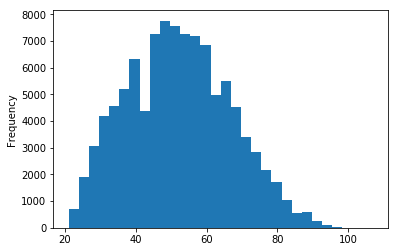

In [17]:
model_data["age"].plot.hist(bins=30);

In [18]:
# 可以看出收入有少部分人非常高，使用小于 99% 的分位数的数据查看收入分布
income = model_data["MonthlyIncome"]

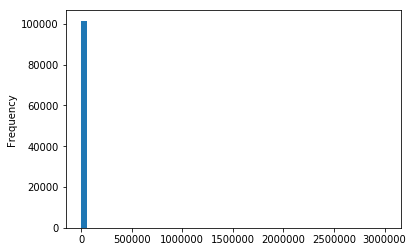

In [19]:
income.plot.hist(bins=50);

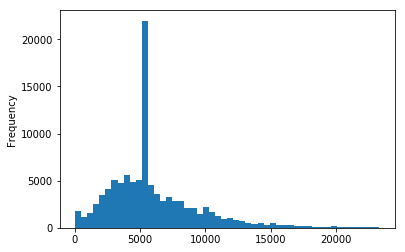

In [20]:
income.loc[income < 23334].plot.hist(bins=50);

In [21]:
model_data.corr().to_excel("CorrData.xlsx")

In [22]:
from auto_bin import AutoBins

In [23]:
bins_data = AutoBins(model_data, "SeriousDlqin2yrs")

In [24]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [119]:
# 通过下面的函数来完成分箱个数的判断 箱体是前开后闭
num_bins, woe_df, iv = bins_data.auto_bins("age",n=2)

对 age 列进行分箱: 
分组个数: 20 	iv值: 0.23724438761130953
分组个数: 19 	iv值: 0.23723359920650364
分组个数: 18 	iv值: 0.237182142631764
分组个数: 17 	iv值: 0.23715172317950203
分组个数: 16 	iv值: 0.23712613566748994
分组个数: 15 	iv值: 0.23707968641951685
分组个数: 14 	iv值: 0.2369960731117691
分组个数: 13 	iv值: 0.23689514241922724
分组个数: 12 	iv值: 0.2367914403169827
分组个数: 11 	iv值: 0.23653142904980312
分组个数: 10 	iv值: 0.23633188826008528
分组个数: 09 	iv值: 0.2359466565765329
分组个数: 08 	iv值: 0.2354907914912336
分组个数: 07 	iv值: 0.2340609961719602
分组个数: 06 	iv值: 0.2332456030618488
分组个数: 05 	iv值: 0.22999238737617622
分组个数: 04 	iv值: 0.22573496288599765
分组个数: 03 	iv值: 0.20249103125777562
分组个数: 02 	iv值: 0.18775309298943932

最后分箱情况: 
分组个数: 02 	iv值: 0.18775309298943932

分组woe情况：
    min   max  count_0  count_1  total  percentage  bad_rate       woe
0  -inf  56.0    57145     5441  62586    0.615114  0.086936 -0.281620
1  56.0   inf    37782     1379  39161    0.384886  0.035214  0.677225


In [120]:
# 分析过程中手动完成分箱个数的添加
bins_num = {
"RevolvingUtilizationOfUnsecuredLines":5,
"age":5,
"NumberOfTime30-59DaysPastDueNotWorse":3,
"DebtRatio":5,
"MonthlyIncome":6,
"NumberOfOpenCreditLinesAndLoans":4,
"NumberOfTimes90DaysLate":2,
"NumberRealEstateLoansOrLines":4,
"NumberOfTime60-89DaysPastDueNotWorse":2,
"NumberOfDependents":4,
}

In [121]:
info_values = {}
woe_values = {}
bins_values = {}
for key in bins_num:
    num_bins, woe_df, iv = bins_data.auto_bins(key, n=bins_num[key], show_iv=False)
    info_values[key] = iv
    woe_values[key] = woe_df
    bins_values[key] = [x[0] for x in num_bins] + [float("inf")]

对 RevolvingUtilizationOfUnsecuredLines 列进行分箱: 
对 age 列进行分箱: 
对 NumberOfTime30-59DaysPastDueNotWorse 列进行分箱: 
对 DebtRatio 列进行分箱: 
对 MonthlyIncome 列进行分箱: 
对 NumberOfOpenCreditLinesAndLoans 列进行分箱: 
对 NumberOfTimes90DaysLate 列进行分箱: 
对 NumberRealEstateLoansOrLines 列进行分箱: 
对 NumberOfTime60-89DaysPastDueNotWorse 列进行分箱: 
对 NumberOfDependents 列进行分箱: 


In [122]:
info_values

{'RevolvingUtilizationOfUnsecuredLines': 1.0862047304628188,
 'age': 0.22999238737617622,
 'NumberOfTime30-59DaysPastDueNotWorse': 0.7380481228387712,
 'DebtRatio': 0.07354956193272312,
 'MonthlyIncome': 0.07672117165629971,
 'NumberOfOpenCreditLinesAndLoans': 0.07981741671159143,
 'NumberOfTimes90DaysLate': 0.8035216030979855,
 'NumberRealEstateLoansOrLines': 0.05916971649181881,
 'NumberOfTime60-89DaysPastDueNotWorse': 0.5433285158150472,
 'NumberOfDependents': 0.0334568806578509}

In [123]:
def plt_iv(info_values):
    keys,values = zip(*info_values.items())
    nums = range(len(keys))
    plt.barh(nums,values)
    plt.yticks(nums,keys)
    for i, v in enumerate(values):
        plt.text(v, i-.2, f"{v:.2f}")
    

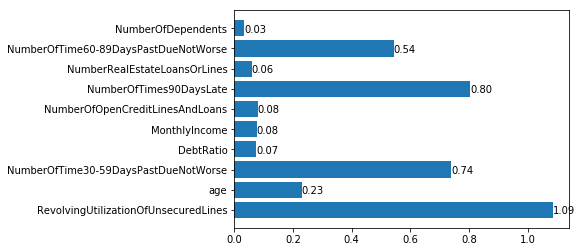

In [124]:
plt_iv(info_values)

In [125]:
# model_data.head()
model_woe = pd.DataFrame(index=model_data.index)
woe_values['age']#["woe"]

,min,max,count_0,count_1,total,percentage,bad_rate,woe
0,-inf,36.0,14271,1713,15984,0.157096,0.107170,-0.513265
1,36.0,52.0,33788,3074,36862,0.362291,0.083392,-0.236123
2,52.0,56.0,9086,654,9740,0.095728,0.067146,-0.001866
3,56.0,65.0,19422,897,20319,0.199701,0.044146,0.441857
4,65.0,inf,18360,482,18842,0.185185,0.025581,1.006737


In [126]:
for col in bins_values:
    bins = bins_values[col]
    labels = woe_values[col]["woe"]
    model_woe[col] = pd.cut(model_data[col], bins, labels=labels).astype(np.float)
    model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

In [127]:
model_woe.head(5)

,RevolvingUtilizationOfUnsecuredLines,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
64863,-1.085646,0,-0.236123,0.547188,0.100672,-0.374450,0.105359,0.376017,-0.238641,0.277329,-0.312630
84119,0.514000,0,-0.236123,0.547188,0.125278,0.113386,0.105359,0.376017,0.223240,0.277329,0.151337
63595,-0.314008,0,0.441857,0.547188,0.100672,0.113386,0.105359,0.376017,0.223240,0.277329,0.151337
76685,-0.314008,0,-0.236123,0.547188,0.100672,0.275220,0.105359,0.376017,0.223240,0.277329,-0.135992
130077,-1.085646,0,1.006737,0.547188,0.100672,-0.178204,0.105359,0.376017,-0.238641,0.277329,0.151337


In [129]:
model_woe.to_csv('WoeData.csv',encoding="utf8", index=False)

In [130]:
import statsmodels.api as sm
data = pd.read_csv('WoeData.csv',encoding="utf8")
# 设置因变量
endog = data['SeriousDlqin2yrs']
X = data.drop(["SeriousDlqin2yrs",
    "NumberRealEstateLoansOrLines",
    "NumberOfDependents"],axis=1)

In [131]:
# 设置自变量
exog = sm.add_constant(X)
logit = sm.Logit(endog,exog)
result = logit.fit()

C:\Users\CDA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.184521
         Iterations 8


In [132]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               101747
Model:                          Logit   Df Residuals:                   101738
Method:                           MLE   Df Model:                            8
Date:                Sun, 03 Mar 2019   Pseudo R-squ.:                  0.2496
Time:                        14:21:42   Log-Likelihood:                -18774.
converged:                       True   LL-Null:                       -25018.
                                        LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.6092      0.015   -170.618      0.000      -2.639      -2.579
RevolvingUtilizationOfUnsecuredLines    -0.6036      0.015    -40.615      0.000      -0.633      -0.574
age                                     -0.4540      0.033    -13.699      0.000      -0.519      -0.389
NumberOfTime30-59DaysPastDueNotWorse    -0.5556      0.016    -35.271      0.000      -0.587      -0.525
DebtRatio                               -0.6368      0.054    -11.859      0.000      -0.742      -0.532
MonthlyIncome                           -0.2574      0.053     -4.865      0.000      -0.361      -0.154
NumberOfOpenCreditLinesAndLoans         -0.2481      0.046     -5.339      0.000      -0.339      -0.157
NumberOfTimes90DaysLate                 -0.5441      0.014    -38.542      0.000      -0.572      -0.516
NumberOfTime60-89DaysPastDueNotWorse    -0.4114      0.017    -23.829      0.000      -0.445      -0.378
========================================================================================================
"""

In [145]:
vali_data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [150]:
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_values:
    bins = bins_values[col]
    labels = woe_values[col]["woe"]
    vali_woe[col] = pd.cut(vali_data[col], bins, labels=labels).astype(np.float)
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
vali_Y = vali_woe['SeriousDlqin2yrs']
vali_X = vali_woe.drop(["SeriousDlqin2yrs",
        "NumberRealEstateLoansOrLines",
        "NumberOfDependents"],axis=1)

In [151]:
vali_exog = sm.add_constant(vali_X)

C:\Users\CDA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [155]:
%%cmd

pip install scikit-plot

Microsoft Windows [版本 6.1.7601]
版权所有 (c) 2009 Microsoft Corporation。保留所有权利。

C:\Users\CDA\Desktop\Python评分卡课件20190302>
C:\Users\CDA\Desktop\Python评分卡课件20190302>pip install scikit-plot

C:\Users\CDA\Desktop\Python评分卡课件20190302>

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [152]:
vali_proba = result.predict(vali_exog)

In [156]:
# cmd 中执行 pip install scikit-plot
import scikitplot as skplt

In [157]:
vali_proba

134944    0.013123
128441    0.016905
53834     0.009838
20893     0.048693
69665     0.011659
65587     0.016905
111486    0.016905
21986     0.012677
95356     0.011659
109983    0.026700
47513     0.017167
67298     0.017167
77129     0.037675
67065     0.031407
63548     0.077256
101365    0.015550
101995    0.033781
84602     0.032170
32300     0.019419
106636    0.024359
147413    0.035469
5236      0.012482
25756     0.014720
39015     0.030628
115579    0.015795
24033     0.036866
27797     0.147217
144113    0.022159
110534    0.011659
5483      0.027699
            ...   
101770    0.025114
98852     0.035101
133289    0.029505
37303     0.074239
93233     0.014128
21245     0.019419
888       0.025604
62877     0.024690
22570     0.045641
45444     0.020906
143410    0.244292
66979     0.017167
7243      0.096048
34516     0.025604
7925      0.028524
119017    0.014348
7521      0.544583
88138     0.054489
106883    0.016905
124984    0.009440
23360     0.014348
22987     0.

In [158]:
# 预测结果为对应 1 的概率，转换为数组用于绘图
vali_proba_df = pd.DataFrame(vali_proba,columns=[1])
vali_proba_df.insert(0,0,1-vali_proba_df)

In [159]:
vali_proba_df

,0,1
134944,0.986877,0.013123
128441,0.983095,0.016905
53834,0.990162,0.009838
20893,0.951307,0.048693
69665,0.988341,0.011659
65587,0.983095,0.016905
111486,0.983095,0.016905
21986,0.987323,0.012677
95356,0.988341,0.011659
109983,0.973300,0.026700


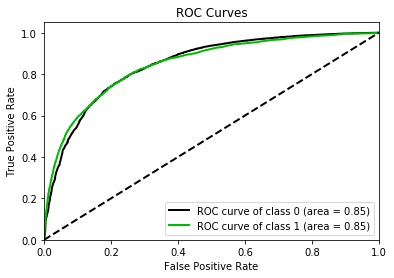

In [160]:
skplt.metrics.plot_roc(vali_Y,
            vali_proba_df,
            plot_micro=False,
            plot_macro=False);

In [161]:
result.params

const                                  -2.609160
RevolvingUtilizationOfUnsecuredLines   -0.603587
age                                    -0.453965
NumberOfTime30-59DaysPastDueNotWorse   -0.555628
DebtRatio                              -0.636832
MonthlyIncome                          -0.257380
NumberOfOpenCreditLinesAndLoans        -0.248086
NumberOfTimes90DaysLate                -0.544126
NumberOfTime60-89DaysPastDueNotWorse   -0.411364
dtype: float64

In [163]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
A,B

(481.8621880878296, 28.85390081777927)

In [164]:
base_score = A - B*result.params["const"]
base_score

557.1466445909771

In [177]:
# 将评分卡写入文件
file = "ScoreData.csv"
with open(file,"w") as fdata:
    fdata.write(f"base_score,{base_score}\n")
for col in result.params.index[1:]:
    temp = woe_values[col]
    score = temp["woe"] * (-B*result.params[col])
    score.name = "Score"
    score.index = [("{:.2f}".format(temp.loc[x, "min"]),"{:.2f}".format(temp.loc[x, "max"])) for x in temp.index]
    score.index.name = col
    score.to_csv(file,header=True,mode="a")

In [178]:
col = "age"

In [179]:
result.params[col]

-0.4539648668313499

In [180]:
temp = woe_values[col]

In [181]:
temp

,min,max,count_0,count_1,total,percentage,bad_rate,woe
age,,,,,,,,
0,-inf,36.0,14271,1713,15984,0.157096,0.107170,-0.513265
1,36.0,52.0,33788,3074,36862,0.362291,0.083392,-0.236123
2,52.0,56.0,9086,654,9740,0.095728,0.067146,-0.001866
3,56.0,65.0,19422,897,20319,0.199701,0.044146,0.441857
4,65.0,inf,18360,482,18842,0.185185,0.025581,1.006737


In [184]:
temp["woe"]* (-B*result.params[col])

age
0    -6.723088
1    -3.092890
2    -0.024442
3     5.787735
4    13.186901
Name: woe, dtype: float64

In [ ]:
temp["woe"] * (-B*result.params[col])

In [167]:
woe_values[col]

,min,max,count_0,count_1,total,percentage,bad_rate,woe
NumberOfTime60-89DaysPastDueNotWorse,,,,,,,,
0,-inf,0.0,91635,4989,96624,0.94965,0.051633,0.277329
1,0.0,inf,3292,1831,5123,0.05035,0.357408,-2.046616


In [168]:
score.index = [(1,2), (2,3)]

In [169]:
score

(1, 2)     3.291746
(2, 3)   -24.292215
Name: Score, dtype: float64

In [139]:
X = [1.,2.,3.]
X = 2.3

X= np.asarray(X)

1/(1+np.exp(-X))



In [ ]:
%%cmd

numpy 
 
conda remove statsmodels -y
conda install statsmodels

In [ ]:
conda update --all

In [ ]:
%%cmd

conda remove pandas -y
conda install pandas 

In [62]:
import numpy as np
import pandas as pd
import scipy


In [63]:
frame= model_data.copy()

In [64]:
y = 'SeriousDlqin2yrs'

In [70]:
column = "age"

In [68]:
_, bins = pd.qcut(frame[column], q=20, retbins=True, duplicates="drop")

In [84]:
bins

array([ 21.,  29.,  33.,  36.,  39.,  41.,  44.,  46.,  48.,  50.,  52.,
        54.,  56.,  58.,  60.,  62.,  65.,  68.,  72.,  77., 107.])

In [85]:
bins = list(bins)
bins.insert(0, -float("inf"))
bins.append(float("inf"))


In [87]:
frame[column+"_qcut"] = pd.cut(frame[column], bins=bins)

In [92]:
frame[column+"_qcut"].value_counts(sort=False)

(-inf, 21.0]       83
(21.0, 29.0]     5553
(29.0, 33.0]     5722
(33.0, 36.0]     4626
(36.0, 39.0]     5624
(39.0, 41.0]     4292
(41.0, 44.0]     6639
(44.0, 46.0]     4979
(46.0, 48.0]     5081
(48.0, 50.0]     5261
(50.0, 52.0]     4986
(52.0, 54.0]     4944
(54.0, 56.0]     4796
(56.0, 58.0]     4694
(58.0, 60.0]     4461
(60.0, 62.0]     4832
(62.0, 65.0]     6332
(65.0, 68.0]     4889
(68.0, 72.0]     4753
(72.0, 77.0]     4299
(77.0, 107.0]    4901
(107.0, inf]        0
Name: age_qcut, dtype: int64

In [96]:
init_counts = list(frame[column+"_qcut"].value_counts(sort=False))

In [99]:
len(frame)

101747

In [100]:
init_counts = list(frame[column+"_qcut"].value_counts(sort=False))
# 查看首尾箱体是否占比超过 2%，如果没有那么将之与相邻的箱体进行合并，用于处理添加 inf 后导致的空字段的问题

In [101]:
init_counts

[83,
 5553,
 5722,
 4626,
 5624,
 4292,
 6639,
 4979,
 5081,
 5261,
 4986,
 4944,
 4796,
 4694,
 4461,
 4832,
 6332,
 4889,
 4753,
 4299,
 4901,
 0]

In [ ]:
if init_counts[0] < (len(frame)/50):
    bins.pop(1)
if init_counts[-1] < (len(frame)/50):
    bins.pop(-2)

In [97]:
# 查看首尾箱体是否占比超过 2%，如果没有那么将之与相邻的箱体进行合并，用于处理添加 inf 后导致的空字段的问题
if init_counts[0] < (len(frame)/50):
    bins.pop(1)
if init_counts[-1] < (len(frame)/50):
    bins.pop(-2)

In [102]:
bins

[-inf,
 29.0,
 33.0,
 36.0,
 39.0,
 41.0,
 44.0,
 46.0,
 48.0,
 50.0,
 52.0,
 54.0,
 56.0,
 58.0,
 60.0,
 62.0,
 65.0,
 68.0,
 inf]

In [103]:
# 使用这个箱体的数据进行分箱并做后续的最优化合并
frame[column+"_qcut"] = pd.cut(frame[column], bins=bins)

In [104]:
# 统计每个分段 0，1的数量
inf_init_bins = frame.groupby([column+"_qcut", y])[y].count().unstack()

In [105]:
inf_init_bins

SeriousDlqin2yrs,0,1
age_qcut,,
"(-inf, 29.0]",4997,639
"(29.0, 33.0]",5119,603
"(33.0, 36.0]",4155,471
"(36.0, 39.0]",5121,503
"(39.0, 41.0]",3915,377
"(41.0, 44.0]",6078,561
"(44.0, 46.0]",4562,417
"(46.0, 48.0]",4681,400
"(48.0, 50.0]",4834,427


In [106]:
# num_bins值分别为每个区间的上界，下界，0的频次，1的频次
num_bins = [*zip(bins, bins[1:], inf_init_bins[0], inf_init_bins[1])]
num_bins

[(-inf, 29.0, 4997, 639),
 (29.0, 33.0, 5119, 603),
 (33.0, 36.0, 4155, 471),
 (36.0, 39.0, 5121, 503),
 (39.0, 41.0, 3915, 377),
 (41.0, 44.0, 6078, 561),
 (44.0, 46.0, 4562, 417),
 (46.0, 48.0, 4681, 400),
 (48.0, 50.0, 4834, 427),
 (50.0, 52.0, 4597, 389),
 (52.0, 54.0, 4602, 342),
 (54.0, 56.0, 4484, 312),
 (56.0, 58.0, 4460, 234),
 (58.0, 60.0, 4258, 203),
 (60.0, 62.0, 4598, 234),
 (62.0, 65.0, 6106, 226),
 (65.0, 68.0, 4748, 141),
 (68.0, inf, 13612, 341)]

In [118]:
num_bins[0][2:]

(4997, 639)

In [ ]:
        idx = 0
        while idx < len(num_bins):
            # 如果是第一个组某个分类为 0，向后合并
            if 0 in num_bins[0][2:]:
                num_bins = self._merger_bins(num_bins, idx)
                continue
            else:
                # 如果后面的组某个分类为 0 ，向前合并，合并后 num_bins 变短
                # 所以需要继续查看当前的 idx 的位置
                if 0 in num_bins[idx][2:]:
                    num_bins = self._merger_bins(num_bins, idx-1)
                    continue
                else:
                    # 如果没有出现某个分类统计为 0 ，查看下一个 idx 的位置
                    idx += 1
        return num_bins

In [ ]:
# utf8
# Hsiaofei Tsien

import numpy as np
import pandas as pd
import scipy


class AutoBins:

    def __init__(self, frame, y):
        self._frame = frame.copy()
        self._y = y

    def _column_qcut(self, column):

        # 进行初始化分箱，先分成 20 个箱体
        _, bins = pd.qcut(self._frame[column], q=20, retbins=True, duplicates="drop")

        # 排除因为开闭区间导致的临界值取值问题
        bins = list(bins)
        bins.insert(0, -float("inf"))
        bins.append(float("inf"))

        # 按照添加了最大最小值后的箱体重新分箱
        self._frame[column+"_qcut"] = pd.cut(self._frame[column], bins=bins)

        init_counts = list(self._frame[column+"_qcut"].value_counts(sort=False))
        # 查看首尾箱体是否占比超过 2%，如果没有那么将之与相邻的箱体进行合并，用于处理添加 inf 后导致的空字段的问题
        if init_counts[0] < (len(self._frame)/50):
            bins.pop(1)
        if init_counts[-1] < (len(self._frame)/50):
            bins.pop(-2)

        # 使用这个箱体的数据进行分箱并做后续的最优化合并
        self._frame[column+"_qcut"] = pd.cut(self._frame[column], bins=bins)
        # 统计每个分段 0，1的数量
        inf_init_bins = self._frame.groupby([column+"_qcut", self._y])[self._y].count().unstack()
        # num_bins值分别为每个区间的上界，下界，0的频次，1的频次
        num_bins = [*zip(bins, bins[1:], inf_init_bins[0], inf_init_bins[1])]
        return num_bins

    def _merge_zero_bins(self, num_bins):
        # 用于确保所有的分组均包含两种分类
        idx = 0
        while idx < len(num_bins):
            # 如果是第一个组某个分类为 0，向后合并
            if 0 in num_bins[0][2:]:
                num_bins = self._merger_bins(num_bins, idx)
                continue
            else:
                # 如果后面的组某个分类为 0 ，向前合并，合并后 num_bins 变短
                # 所以需要继续查看当前的 idx 的位置
                if 0 in num_bins[idx][2:]:
                    num_bins = self._merger_bins(num_bins, idx-1)
                    continue
                else:
                    # 如果没有出现某个分类统计为 0 ，查看下一个 idx 的位置
                    idx += 1
        return num_bins

    def _merger_bins(self, num_bins, x):
        # 合并 num_bins x 索引和 x+1 索引的分组数据
        num_bins[x: x+2] = [(
            num_bins[x][0],
            num_bins[x+1][1],
            num_bins[x][2]+num_bins[x+1][2],
            num_bins[x][3]+num_bins[x+1][3]
        )]
        return num_bins

    # 创建计算 iv 值函数
    def _get_iv(self, woe_df):
        rate = ((woe_df.count_0/woe_df.count_0.sum()) -
                (woe_df.count_1/woe_df.count_1.sum()))
        iv = np.sum(rate * woe_df.woe)
        return iv


    # 定义计算 woe 的函数
    def _get_woe(self, num_bins):
        # 通过 num_bins 数据计算 woe
        columns = ["min", "max", "count_0", "count_1"]
        df = pd.DataFrame(num_bins, columns=columns)

        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["woe"] = np.log(
            (df.count_0 / df.count_0.sum()) /
            (df.count_1 / df.count_1.sum())
            )
        return df

    def _chi2_merge(self, num_bins):
        p_values = []
        # 获取 num_bins 两两之间的卡方检验的置信度（或卡方值）
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            # 0 返回 chi2 值，1 返回 p 值。
            pv = scipy.stats.chi2_contingency([x1, x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1, x2])[0]
            p_values.append(pv)

        # 通过 p 值进行处理。合并 p 值最大的两组
        idx = p_values.index(max(p_values))
        num_bins = self._merger_bins(num_bins, idx)
        return num_bins

    def auto_bins(self, column, n=2, show_iv=True):
        print(f"对 {column} 列进行分箱: ")
        # 初始化分箱
        num_bins = self._column_qcut(column)
        # 合并没有包含两类的分箱
        num_bins = self._merge_zero_bins(num_bins)
        
        # 通过 chi2_merge 不断合并最相似的相邻箱体
        while len(num_bins) > n:
            num_bins = self._chi2_merge(num_bins)
            woe_df = self._get_woe(num_bins)
            iv = self._get_iv(woe_df)
            if show_iv:
                print(f"分组个数: {len(num_bins):02d} \tiv值: {iv}")

        woe_df = self._get_woe(num_bins)
        iv = self._get_iv(woe_df)
        if show_iv:
            print("\n最后分箱情况: ")
            print(f"分组个数: {len(num_bins):02d} \tiv值: {iv}")
            print(f"\n分组woe情况：")
            print(woe_df)
        return num_bins, woe_df, iv


# if __name__ == "__main__":
    # model_data = pd.read_csv("ChiMergeData.csv", encoding="utf8")
    # bins_data = AutoBins(model_data, "SeriousDlqin2yrs")
    # bins_data.auto_bins("age", n=4)


In [107]:
zip([1,2,3],[4,5,6])

In [108]:
list(zip([1,2,3],[4,5,6]))

[(1, 4), (2, 5), (3, 6)]

In [111]:
[*zip([1,2,3],[4,5,6])]

[(1, 4), (2, 5), (3, 6)]

In [112]:
[zip([1,2,3],[4,5,6])]

In [113]:
a = [1,2,3]

In [114]:
b = [a]

In [115]:
b

[[1, 2, 3]]

In [116]:
c = [*a]

In [117]:
c

[1, 2, 3]